# Deterministic phase portrait of network system for a linear feedback control

Uses the nominal parameterisation of the following state-dependent replication rate

$\lambda(w,m) = \mu + b (\kappa - w - \delta m)$


In [1]:
import numpy as np
import pdb

In [2]:
import mitonetworks.det as mt

In [3]:
make_trajectories = True

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
mt.reset_plots()

## Parameter definition

In [5]:
params = {
    'beta':33.12, 
    'gamma':0.03785142857142858,
    'b':1.2416523075924095e-05, 
    'kappa':11.662903457629223,
    'mu':0.023, 
    'xi':0.0, 
    'delta':1.0
}


## Make trajectories

In [6]:
lc = mt.SoluableFeedbackControl(network_defn=mt.E_linear_feedback_control, ss_indep_variable='ms', params=params, 
                                 ss_definition=mt.E_linear_feedback_control_ss, 
                                 TMAX = 2000.0, species_lim = 500, n_traj = 20,
                               phys_ss_is_point = True)

In [8]:
lc.param_convention

['ws', 'wf', 'ms', 'mf']

In [9]:
np.random.seed(1)

In [10]:
if make_trajectories:
    lc.make_random_trajectories()
    np.save('state_all', lc.state_trajectory_set)
else:
    lc.state_trajectory_set = np.load('state_all.npy')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [11]:
if lc.state_trajectory_set.shape[-1]!=lc.n_traj:
    raise Exception('Dimension mismatch, remake trajectories!')

/home/juvid/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/juvid/anaconda2/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (87) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/juvid/anaconda2/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (105) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
/home/juvid/anaconda2/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (108) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted w

/home/juvid/anaconda2/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (98) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))


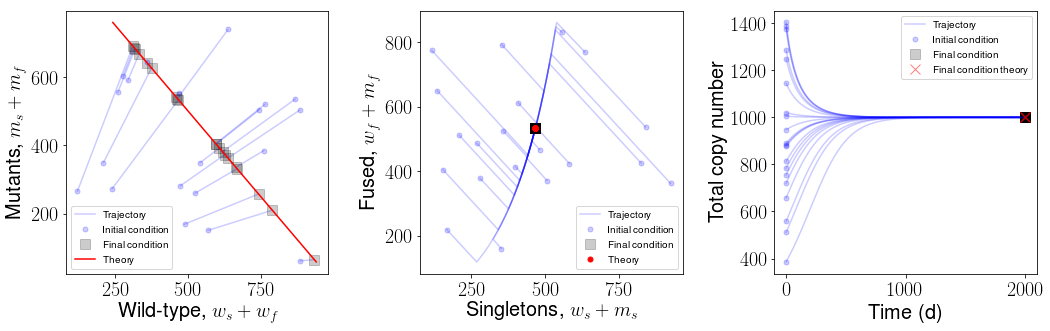

In [12]:
lc.make_trajetory_plot()

## Jacobian matrix

In [13]:
s = mt.E_linear_feedback_control_ss(100,params) # state
J = mt.E_linear_feedback_control_jac(s,params)
np.linalg.eig(J)

(array([-6.69996917e-03, -2.62680502e-15, -7.10004546e+01, -7.09947380e+01]),
 array([[-0.25890909,  0.465396  , -0.6822732 , -0.50008099],
        [-0.929332  ,  0.53235943,  0.68205217,  0.499919  ],
        [-0.07065394, -0.465396  , -0.18618616,  0.50008099],
        [-0.25360627, -0.53235943,  0.18612585, -0.499919  ]]))

In [14]:
s = mt.E_linear_feedback_control_ss(200,params) # state
J = mt.E_linear_feedback_control_jac(s,params)
np.linalg.eig(J)

(array([-7.10004546e+01, -7.09947380e+01, -6.69996917e-03, -7.55004950e-15]),
 array([[-0.56560897, -0.50008099, -0.21463734,  0.465396  ],
        [ 0.56542574,  0.499919  , -0.77042235,  0.53235943],
        [-0.42455682,  0.50008099, -0.16111086, -0.465396  ],
        [ 0.42441928, -0.499919  , -0.57829362, -0.53235943]]))

So we have 3 negative eigenvalues and 1 zero eigenvalue